# Which one is a better plan?

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

# Table of Contents
* Introduction
    * Data overview
        * 1.1 Loading Data
        * 1.2 Preparing Data
    * Data Processing
        * 2.1 Aggregating Data per User
        * 2.2 Plan User Behavior
        * 2.3 Monthly Plan Revenue
    * Hypotheses Testing
        * 3.1 Hypothesis 1: Average revenue from users of the Ultimate and Surf calling plans differs
        * 3.2 Hypothesis 2: Users in the NY-NJ area is the same as that of users in other regions as to revenue
    * Overall Conclusion 

## Initialization

In [1]:
# Loading all the libraries
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy import stats as st
import plotly
import plotly.express as px
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

## Load data

In [2]:
# Load the data files into different DataFrames
df_calls = pd.read_csv('megaline_calls.csv')
df_net = pd.read_csv('megaline_internet.csv')
df_msg = pd.read_csv('megaline_messages.csv')
df_plans = pd.read_csv('megaline_plans.csv')
df_users = pd.read_csv('megaline_users.csv')

## Prepare the data

## Plans

In [3]:
df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
display(df_plans)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Users

In [5]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [6]:
display(df_users)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN


### Fix Data

In [7]:
df_users["churn_date"] = pd.to_datetime(df_users["churn_date"],format='%Y-%m-%d')
df_users["reg_date"] = pd.to_datetime(df_users["reg_date"],format='%Y-%m-%d')

In [8]:
df_users['churn_date'] = df_users['churn_date'].fillna('unknown')

In [9]:
df_users.isnull().sum()

user_id       0
first_name    0
last_name     0
age           0
city          0
reg_date      0
plan          0
churn_date    0
dtype: int64

In [10]:
df_users.head(20)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,unknown
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,unknown
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,unknown
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,unknown
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,unknown
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,unknown
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18 00:00:00
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,unknown
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,unknown
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,unknown


In [11]:
df_users[['city_new', 'state']] = df_users["city"].apply(lambda x: pd.Series(str(x).split(",")))

## Calls

In [12]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [13]:
display(df_calls)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72
137731,1499_200,1499,2018-10-20,10.89
137732,1499_201,1499,2018-09-21,8.12
137733,1499_202,1499,2018-10-10,0.37


### Fix data

In [14]:
df_calls["call_date"] = pd.to_datetime(df_calls["call_date"],format='%Y-%m-%d')

## Messages

In [15]:
df_msg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [16]:
display(df_msg)

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
...,...,...,...
76046,1497_526,1497,2018-12-24
76047,1497_536,1497,2018-12-24
76048,1497_547,1497,2018-12-31
76049,1497_558,1497,2018-12-24


## Internet

In [17]:
df_net.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [18]:
display(df_net)

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06
104821,1499_216,1499,2018-12-30,304.72
104822,1499_217,1499,2018-09-22,292.75
104823,1499_218,1499,2018-12-07,0.00


### Fix data

In [19]:
df_net["session_date"] = pd.to_datetime(df_net["session_date"],format='%Y-%m-%d')

## Study plan conditions

In [20]:
display(df_plans)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Aggregate data per user


In [21]:
df_calls['year'] = df_calls['call_date'].dt.year
df_calls['month'] = df_calls['call_date'].dt.month
df_calls['day'] = df_calls['call_date'].dt.day

In [22]:
df_msg["message_date"] = pd.to_datetime(df_msg["message_date"],format='%Y-%m-%d')

In [23]:
df_msg['year'] = df_msg['message_date'].dt.year
df_msg['month'] = df_msg['message_date'].dt.month
df_msg['day'] = df_msg['message_date'].dt.day

In [24]:
df_net['year'] = df_net['session_date'].dt.year
df_net['month'] = df_net['session_date'].dt.month
df_net['day'] = df_net['session_date'].dt.day

In [25]:
df_calls_group = df_calls.groupby("month")["user_id"].count()
df_calls_group

month
1       172
2       774
3      1620
4      3442
5      5959
6      8221
7     11105
8     13590
9     16523
10    21064
11    24651
12    30614
Name: user_id, dtype: int64

In [26]:
df_calls['duration'] = round(df_calls['duration'])
df_user_calls = df_calls.groupby(['user_id', 'month']).agg({'duration': "sum", 'id': "count"})
df_user_calls

duration  id
user_id month              
1000    12        117.0  16
1001    8         173.0  27
        9         297.0  49
        10        374.0  65
        11        404.0  64
...                 ...  ..
1498    12        326.0  39
1499    9         328.0  41
        10        361.0  53
        11        287.0  45
        12        463.0  65

[2258 rows x 2 columns]

In [27]:
df_user_msg = df_msg.groupby(['user_id', 'month']).agg({'id': 'count'})
df_user_msg

id
user_id month    
1000    12     11
1001    8      30
        9      44
        10     53
        11     36
...            ..
1496    9      21
        10     18
        11     13
        12     11
1497    12     50

[1806 rows x 1 columns]

In [28]:
df_user_inter = df_net.groupby(['user_id', 'month']).agg({'mb_used': 'count'})
df_user_inter

mb_used
user_id month         
1000    12           5
1001    8           25
        9           53
        10          56
        11          51
...                ...
1498    12          65
1499    9           45
        10          61
        11          49
        12          65

[2277 rows x 1 columns]

In [29]:
df_user_calls = df_user_calls.reset_index()
df_user_msg = df_user_msg.reset_index()
df_user_inter = df_user_inter.reset_index()

In [30]:
calls_and_messages = df_user_calls.merge(df_user_msg, on=['user_id','month'], how='outer')
calls_and_messages.head()

,user_id,month,duration,id_x,id_y
0,1000,12,117.0,16.0,11.0
1,1001,8,173.0,27.0,30.0
2,1001,9,297.0,49.0,44.0
3,1001,10,374.0,65.0,53.0
4,1001,11,404.0,64.0,36.0


In [31]:
calls_and_messages = df_user_calls.merge(df_user_msg, on=['user_id','month', 'id'], how='outer')
calls_and_messages.head() 

,user_id,month,duration,id
0,1000,12,117.0,16
1,1001,8,173.0,27
2,1001,9,297.0,49
3,1001,10,374.0,65
4,1001,11,404.0,64


In [32]:
usage_table = calls_and_messages.merge(df_user_inter, on=['user_id','month'], how='outer')
usage_table.head()

,user_id,month,duration,id,mb_used
0,1000,12,117.0,16.0,5.0
1,1000,12,NaN,11.0,5.0
2,1001,8,173.0,27.0,25.0
3,1001,8,NaN,30.0,25.0
4,1001,9,297.0,49.0,53.0


In [33]:
usage_table_plans = usage_table.merge(df_users, on=['user_id'], how='outer')
usage_table_plans.head()

,user_id,month,duration,id,mb_used,first_name,last_name,age,city,reg_date,plan,churn_date,city_new,state
0,1000,12.0,117.0,16.0,5.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,unknown,Atlanta-Sandy Springs-Roswell,GA MSA
1,1000,12.0,NaN,11.0,5.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,unknown,Atlanta-Sandy Springs-Roswell,GA MSA
2,1001,8.0,173.0,27.0,25.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,unknown,Seattle-Tacoma-Bellevue,WA MSA
3,1001,8.0,NaN,30.0,25.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,unknown,Seattle-Tacoma-Bellevue,WA MSA
4,1001,9.0,297.0,49.0,53.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,unknown,Seattle-Tacoma-Bellevue,WA MSA


In [34]:
def rounding_up (mb):
    rounded = np.ceil(mb/1024)
    return rounded

usage_table_plans['data_rounded_up'] = usage_table_plans['mb_used'].apply(rounding_up)

In [35]:
usage_table_plans.rename(columns = {'duration':'minutes_used', 'id':'number_of_texts'}, inplace=True)

In [36]:
surf_monthly_charge = 20
surf_monthly_minutes = 500
surf_monthly_messages = 50
surf_monthly_data = 15
surf_call_charge = 0.03
surf_message_charge = 0.03
surf_data_charge = 10

ultimate_monthly_charge = 70
ultimate_monthly_minutes = 3000
ultimate_monthly_messages = 1000
ultimate_monthly_data = 30
ultimate_call_charge = 0.01
ultimate_message_charge = 0.01
ultimate_data_charge = 7

def chargeable_calls (row):
    plan = row['plan']
    minutes_used = row['minutes_used']
    
    if plan == 'surf':
        if minutes_used > 500:
            chargeable = minutes_used - 500
        else:
            chargeable = 0
        
    if plan == 'ultimate':
        if minutes_used > 3000:
            chargeable = minutes_used - 3000
        else:
            chargeable = 0
    return chargeable

def chargeable_messages (row):
    plan = row['plan']
    number_of_texts = row['number_of_texts']
    
    if plan == 'surf':
        if number_of_texts > 50:
            chargeable = number_of_texts - 50
        else:
            chargeable = 0
            
    if plan == 'ultimate':
        if number_of_texts > 1000:
            chargeable = number_of_texts - 1000
        else:
            chargeable = 0
    
    return chargeable

def chargeable_data (row):
    plan = row['plan']
    data_rounded_up = row['data_rounded_up']

    if plan == 'surf':
        if data_rounded_up > 15:
            chargeable = data_rounded_up - 15
        else:
            chargeable = 0
    if plan == 'ultimate':
        if data_rounded_up > 30:
            chargeable = data_rounded_up - 30
        else:
            chargeable = 0
    return chargeable

def monthly_rev(row):
    plan = row['plan']
    chargeable_calls = row['chargeable_calls']
    chargeable_messages = row['chargeable_messages']
    chargeable_data = row['chargeable_data']
    
    if plan == 'surf':
        revenue = surf_monthly_charge +((chargeable_calls * surf_call_charge) + (chargeable_messages * surf_message_charge)+ (chargeable_data * surf_data_charge))
    else:
        revenue = ultimate_monthly_charge +((chargeable_calls * ultimate_call_charge) + (chargeable_messages * ultimate_message_charge)+ (chargeable_data * ultimate_data_charge))
    return revenue

#Implement this functions 
usage_table_plans['chargeable_calls'] = usage_table_plans.apply(chargeable_calls, axis =1)
usage_table_plans['chargeable_messages'] = usage_table_plans.apply(chargeable_messages, axis =1)
usage_table_plans['chargeable_data'] = usage_table_plans.apply(chargeable_data, axis =1)

#implement monthly revenue function
usage_table_plans['monthly_revenue'] = usage_table_plans.apply(monthly_rev, axis =1)

#print the head
usage_table_plans.head()

,user_id,month,minutes_used,number_of_texts,mb_used,first_name,last_name,age,city,reg_date,plan,churn_date,city_new,state,data_rounded_up,chargeable_calls,chargeable_messages,chargeable_data,monthly_revenue
0,1000,12.0,117.0,16.0,5.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,unknown,Atlanta-Sandy Springs-Roswell,GA MSA,1.0,0.0,0.0,0,70.0
1,1000,12.0,NaN,11.0,5.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,unknown,Atlanta-Sandy Springs-Roswell,GA MSA,1.0,0.0,0.0,0,70.0
2,1001,8.0,173.0,27.0,25.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,unknown,Seattle-Tacoma-Bellevue,WA MSA,1.0,0.0,0.0,0,20.0
3,1001,8.0,NaN,30.0,25.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,unknown,Seattle-Tacoma-Bellevue,WA MSA,1.0,0.0,0.0,0,20.0
4,1001,9.0,297.0,49.0,53.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,unknown,Seattle-Tacoma-Bellevue,WA MSA,1.0,0.0,0.0,0,20.0


## Plan user behaviour

### Calls

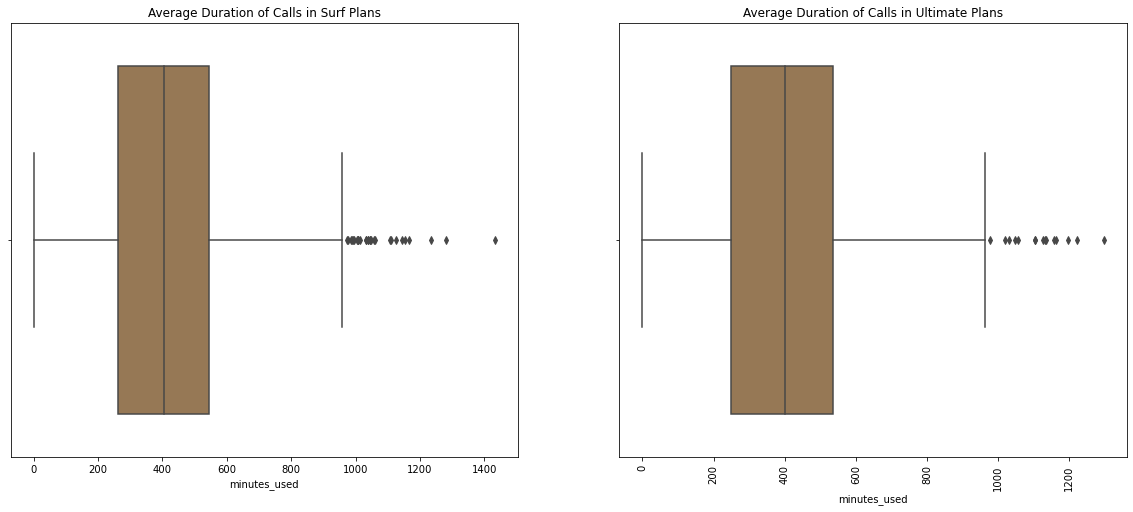

In [37]:
surf_plans = usage_table_plans[usage_table_plans['plan'] == 'surf']
ultimate_plans = usage_table_plans[usage_table_plans['plan'] == 'ultimate']


# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Average Duration of Calls in Surf Plans')
sns.boxplot(x=surf_plans['minutes_used'], palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('Average Duration of Calls in Ultimate Plans')
sns.boxplot(x=ultimate_plans['minutes_used'],palette=("cubehelix"))
plt.xticks(rotation=90)

plt.show()

In [38]:
usage_table_plans.describe()

,user_id,month,minutes_used,number_of_texts,mb_used,age,data_rounded_up,chargeable_calls,chargeable_messages,chargeable_data,monthly_revenue
count,4047.000000,4037.000000,2258.000000,4035.000000,4009.000000,4047.000000,4009.0,4047.000000,4047.000000,4047.0,4047.000000
mean,1246.234989,9.210305,411.383968,52.836183,46.110501,45.517420,1.0,18.940203,9.716333,0.0,36.859202
std,141.581764,2.472668,219.176903,33.682118,19.011854,16.765845,0.0,72.541201,20.136572,0.0,22.882078
min,1000.000000,1.000000,0.000000,1.000000,1.000000,18.000000,1.0,0.000000,0.000000,0.0,20.000000
25%,1123.500000,8.000000,259.000000,27.000000,35.000000,30.000000,1.0,0.000000,0.000000,0.0,20.000000
50%,1246.000000,10.000000,404.000000,49.000000,48.000000,46.000000,1.0,0.000000,0.000000,0.0,20.660000
75%,1366.000000,11.000000,543.750000,74.000000,58.000000,61.000000,1.0,0.000000,11.000000,0.0,70.000000
max,1499.000000,12.000000,1433.000000,266.000000,138.000000,75.000000,1.0,933.000000,216.000000,0.0,70.000000


In [39]:
print(usage_table_plans['minutes_used'].var())

48038.514886861114


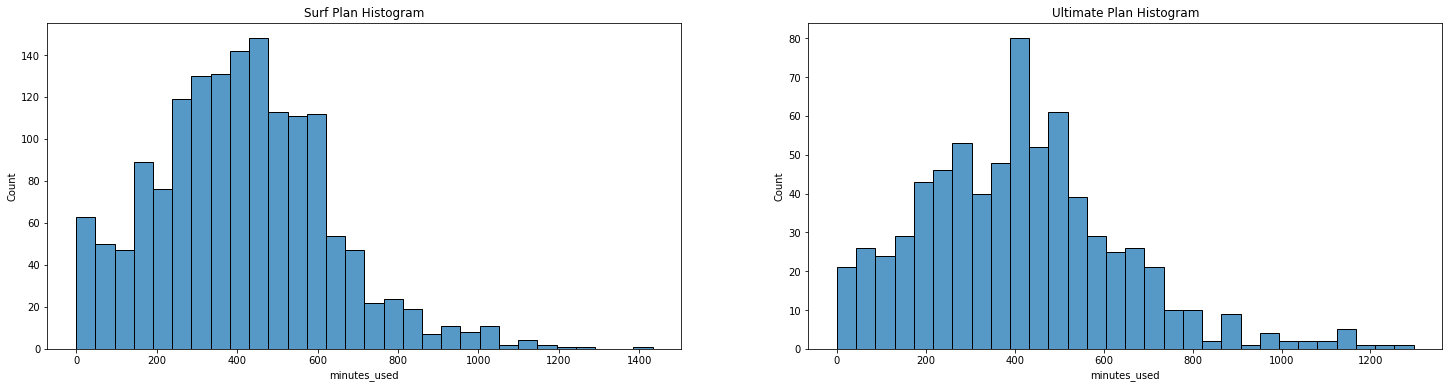

In [40]:
plt.figure(figsize=(25, 6))

plt.subplot(1,2,1)
plt.title('Surf Plan Histogram')
sns.histplot(data=surf_plans, x='minutes_used', bins=30)

plt.subplot(1,2,2)
plt.title('Ultimate Plan Histogram')
sns.histplot(data=ultimate_plans, x='minutes_used', bins=30)

plt.show()

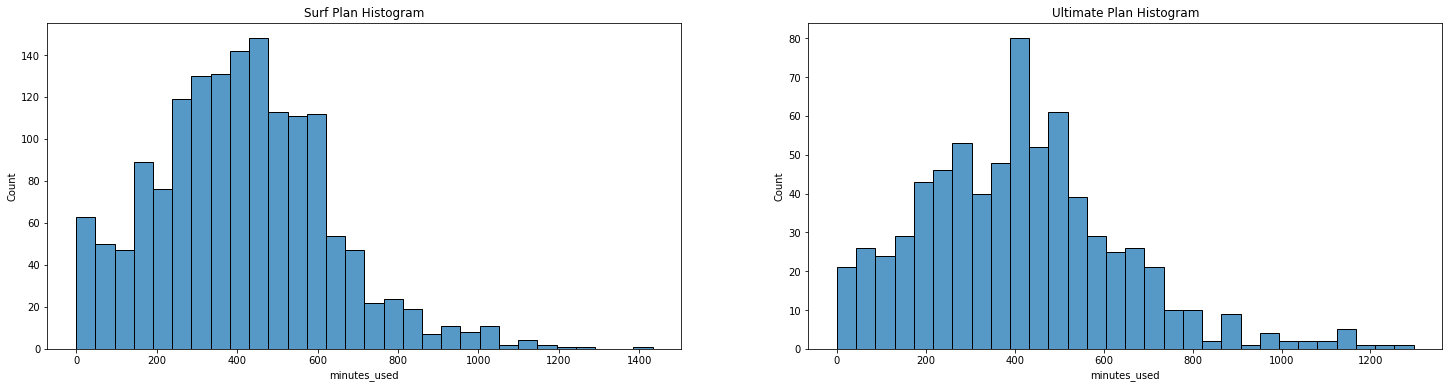

In [41]:
plt.figure(figsize=(25, 6))

plt.subplot(1,2,1)
plt.title('Surf Plan Histogram')
sns.histplot(data=surf_plans, x='minutes_used', bins=30)

plt.subplot(1,2,2)
plt.title('Ultimate Plan Histogram')
sns.histplot(data=ultimate_plans, x='minutes_used', bins=30)

plt.show()

### Messages

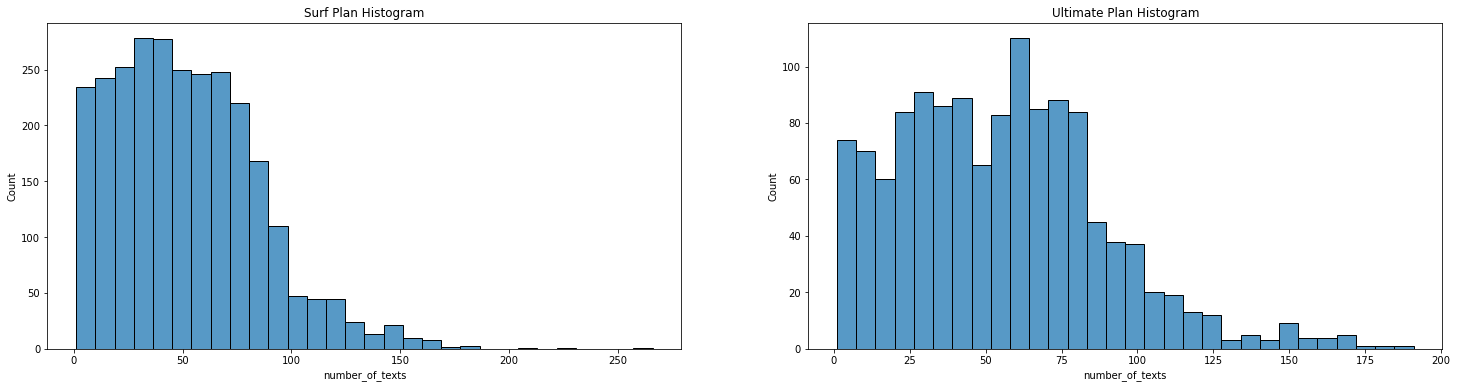

In [42]:
plt.figure(figsize=(25, 6))

plt.subplot(1,2,1)
plt.title('Surf Plan Histogram')
sns.histplot(data=surf_plans, x='number_of_texts', bins=30)

plt.subplot(1,2,2)
plt.title('Ultimate Plan Histogram')
sns.histplot(data=ultimate_plans, x='number_of_texts', bins=30)

plt.show()

 * Observations:
 * As to use of text, not much users use it. Mostly use Surf for messaging. 

### Internet

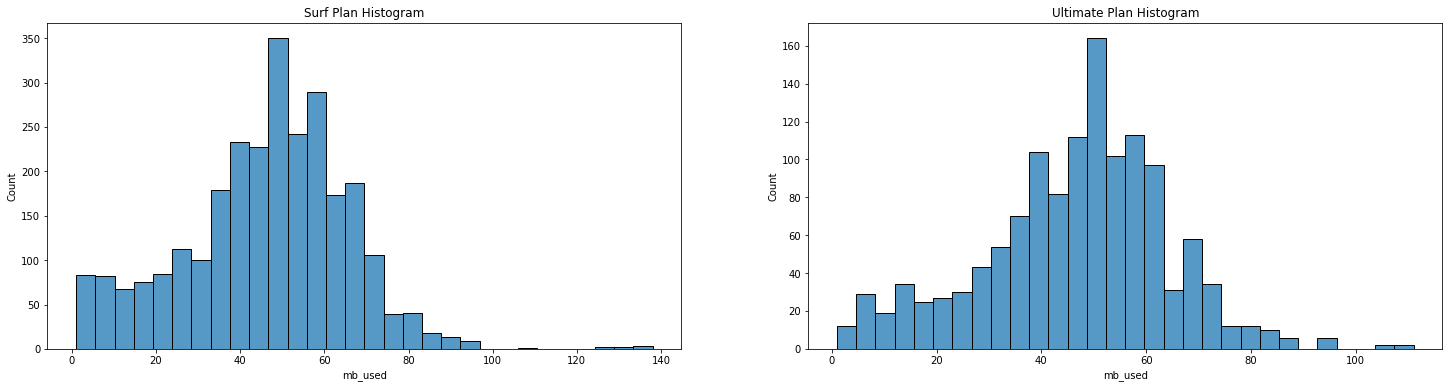

In [43]:
plt.figure(figsize=(25, 6))

plt.subplot(1,2,1)
plt.title('Surf Plan Histogram')
sns.histplot(data=surf_plans, x='mb_used', bins=30)

plt.subplot(1,2,2)
plt.title('Ultimate Plan Histogram')
sns.histplot(data=ultimate_plans, x='mb_used', bins=30)

plt.show()

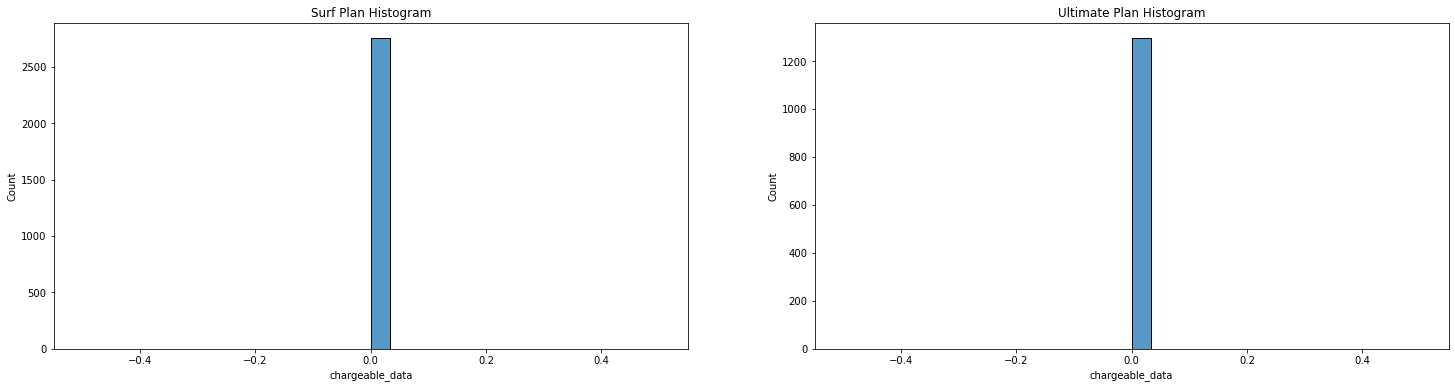

In [44]:
plt.figure(figsize=(25, 6))

plt.subplot(1,2,1)
plt.title('Surf Plan Histogram')
sns.histplot(data=surf_plans, x='chargeable_data', bins=30)

plt.subplot(1,2,2)
plt.title('Ultimate Plan Histogram')
sns.histplot(data=ultimate_plans, x='chargeable_data', bins=30)

plt.show()

## Revenue

[Likewise you have studied the user behaviour, statistically describe the revenue between the plans.]

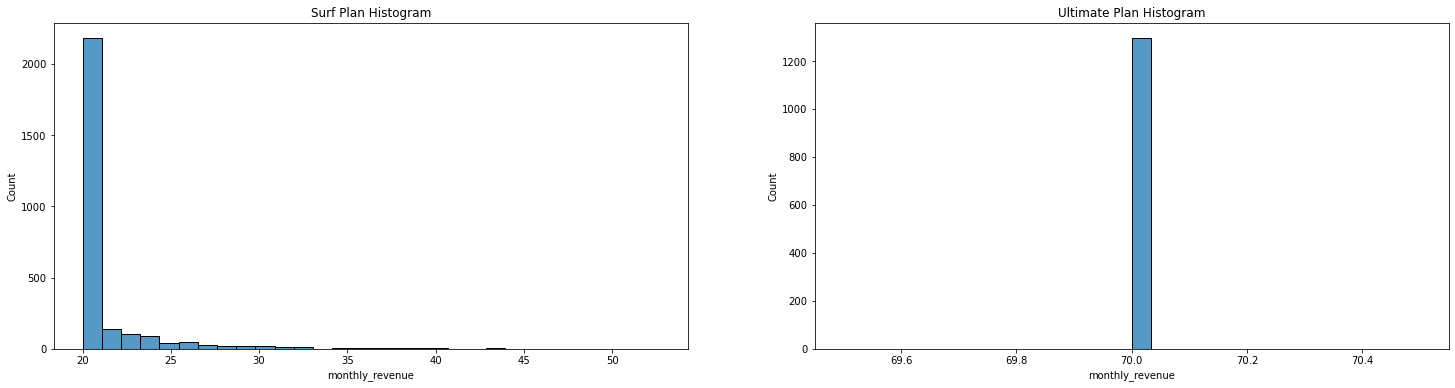

In [45]:
plt.figure(figsize=(25, 6))

plt.subplot(1,2,1)
plt.title('Surf Plan Histogram')
sns.histplot(data=surf_plans, x='monthly_revenue', bins=30)

plt.subplot(1,2,2)
plt.title('Ultimate Plan Histogram')
sns.histplot(data=ultimate_plans, x='monthly_revenue', bins=30)

plt.show()

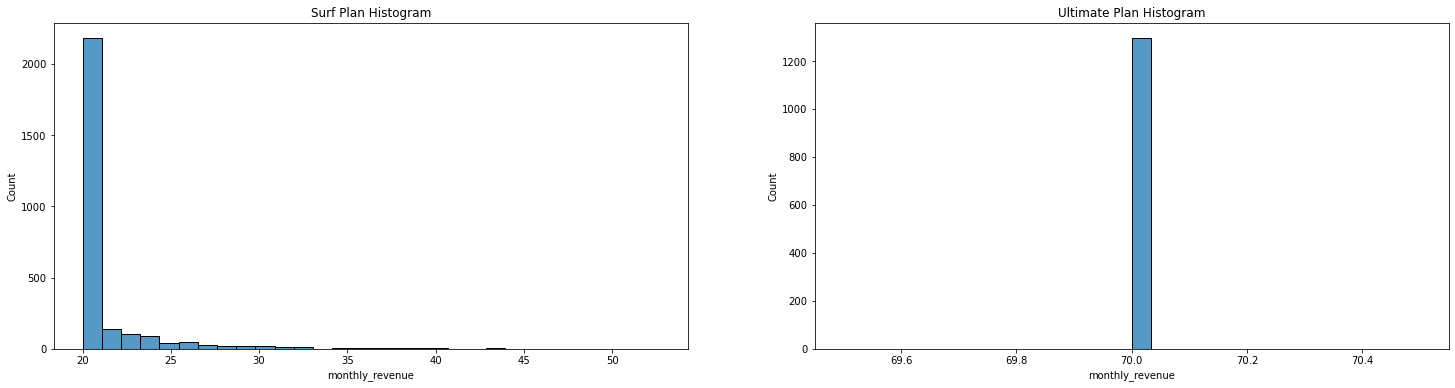

In [46]:
plt.figure(figsize=(25, 6))

plt.subplot(1,2,1)
plt.title('Surf Plan Histogram')
sns.histplot(data=surf_plans, x='monthly_revenue', bins=30)

plt.subplot(1,2,2)
plt.title('Ultimate Plan Histogram')
sns.histplot(data=ultimate_plans, x='monthly_revenue', bins=30)

plt.show()

In [47]:
surf_plans.describe()   

,user_id,month,minutes_used,number_of_texts,mb_used,age,data_rounded_up,chargeable_calls,chargeable_messages,chargeable_data,monthly_revenue
count,2752.000000,2746.000000,1545.000000,2746.000000,2719.000000,2752.000000,2719.0,2752.000000,2752.000000,2752.0,2752.000000
mean,1244.230015,9.218135,411.974757,51.965768,45.985289,44.506904,1.0,27.852834,14.288517,0.0,21.264241
std,137.309765,2.446985,216.677329,33.642093,19.571922,16.678148,0.0,86.550694,23.043515,0.0,3.123202
min,1001.000000,1.000000,0.000000,1.000000,1.000000,18.000000,1.0,0.000000,0.000000,0.0,20.000000
25%,1123.000000,8.000000,262.000000,26.000000,35.000000,29.000000,1.0,0.000000,0.000000,0.0,20.000000
50%,1251.000000,10.000000,406.000000,48.000000,48.000000,45.000000,1.0,0.000000,0.000000,0.0,20.000000
75%,1357.250000,11.000000,546.000000,73.000000,59.000000,60.000000,1.0,0.000000,23.000000,0.0,20.750000
max,1499.000000,12.000000,1433.000000,266.000000,138.000000,75.000000,1.0,933.000000,216.000000,0.0,52.640000


In [48]:
surf_plans.describe()   

,user_id,month,minutes_used,number_of_texts,mb_used,age,data_rounded_up,chargeable_calls,chargeable_messages,chargeable_data,monthly_revenue
count,2752.000000,2746.000000,1545.000000,2746.000000,2719.000000,2752.000000,2719.0,2752.000000,2752.000000,2752.0,2752.000000
mean,1244.230015,9.218135,411.974757,51.965768,45.985289,44.506904,1.0,27.852834,14.288517,0.0,21.264241
std,137.309765,2.446985,216.677329,33.642093,19.571922,16.678148,0.0,86.550694,23.043515,0.0,3.123202
min,1001.000000,1.000000,0.000000,1.000000,1.000000,18.000000,1.0,0.000000,0.000000,0.0,20.000000
25%,1123.000000,8.000000,262.000000,26.000000,35.000000,29.000000,1.0,0.000000,0.000000,0.0,20.000000
50%,1251.000000,10.000000,406.000000,48.000000,48.000000,45.000000,1.0,0.000000,0.000000,0.0,20.000000
75%,1357.250000,11.000000,546.000000,73.000000,59.000000,60.000000,1.0,0.000000,23.000000,0.0,20.750000
max,1499.000000,12.000000,1433.000000,266.000000,138.000000,75.000000,1.0,933.000000,216.000000,0.0,52.640000


## Test statistical hypotheses

In [49]:
alpha = 0.05

sample_1 = usage_table_plans.query('plan == "surf"')['monthly_revenue']
sample_2 = usage_table_plans.query('plan == "ultimate"')['monthly_revenue']
results = st.ttest_ind(sample_1, sample_2, equal_var = False) 
# we set equal_var to False as we don't consider the variances of the statistical populations from which the samples are taken to be are approximately equal.

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")   

p-value:  0.0
We reject the null hypothesis


In [50]:
def replace_NY_NJ(wrong_city, correct_city):
    for wrong_NY_NJ in wrong_city:
        usage_table_plans['city_new'] = usage_table_plans['city_new'].replace(wrong_city, correct_city)

In [51]:
duplicates = ['New York-Newark-Jersey City']
name = 'NY_NJ'
replace_NY_NJ(duplicates, name)

In [52]:
Not_NY_NJ = usage_table_plans.query('city_new != "NY_NJ"')
NY_NJ = usage_table_plans.query('city_new == "NY_NJ"')
alpha = 0.05
sample_3 = NY_NJ['monthly_revenue']
sample_4 = Not_NY_NJ['monthly_revenue']

results1 = st.ttest_ind(sample_3, sample_4)

print('p-value: ', results1.pvalue)

if results1.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value:  6.198513726464773e-15
We reject the null hypothesis


# Overall Conclusion
  In this project, we conducted a data analysis on a sample of customer data from telecom operator Megaline, which offers its clients two prepaid plans: Surf and Ultimate. Our objective was to analyze the behavior of customers and determine which prepaid plan generates more revenue.

We first examined the distribution of call minutes used per month for both plans and found that it approximated a normal distribution. The mean call minutes used per month for Surf is 411.97 minutes and for Ultimate 410.10 minutes. The maximum monthly usage for the Surf plan in this sample was 1433 minutes, compared to 1297 for the Ultimate plan. Additionally, we computed the standard deviation for both plans and found that the standard deviation for Ultimate is 224.48 which is greater than the variance for Surf (at 216.60).

Next, we analyzed the distribution of the number of texts sent per month and found that it was less like a normal distribution. The mean for Surf is 52 texts per month and for Ultimate is higher at 55 texts per month. However, the standard deviations for both plans were very similar: 33.6 for Surf and 33.7 for Ultimate.

Lastly, we looked at the distribution of the volume of data used per month and found that it resembled a normal distribution for both the Surf and Ultimate plans. The mean for Ultimate is higher at 46.37 mb compared to 46 mb for Surf. The standard deviations for both plans were very similar: 20 mb for Surf and 18 mb for Ultimate.

Based on these findings, we can conclude that the behavior of customers on the Surf and Ultimate plans is very similar. Despite the Ultimate plan being more expensive and having greater allowances, Surf customers use slightly more call minutes per month, on average. Ultimate customers do use more data per month that Surf customers, but not significantly more.

We then proceeded to examine the revenue generated by each plan. We found that the mean revenue from Surf is 21.26 dollars and from Ultimate 70 dollars. However, given the large difference in standard deviation (3.1 dollars for Surf and 0 dollars for Ultimate) we conducted a statistical t-test to check the probability that the means were indeed different. The results of this test indicated that there is a very small probability of the means being the same. Therefore, we can reject the probability that the average revenues are the same for both groups and conclude that it is probable that the average revenue from Users of Surf and Ultimate does differ.

Finally, we also conducted a second statistical test to check if the average revenue from users in the New York and New Jersey area is different from that of the users from other regions. The results of this test indicated that the p-value was lower than the critical statistical significance level. Therefore, we reject the null hypothesis that the average revenue from users in the NY-NJ area is the same as that of users in other regions, and therefore, we can say that the averages are different in the two geographical regions.